In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
df=pd.read_csv("PBL5recommendationdata.csv", encoding="ISO-8859-1")

In [11]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [12]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,16.06,NaN,16706988SV3261147,NaN,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20186,17421,1842.0,"Medline Emesis/Barf Bags, throw up bag

In [13]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2602,2205,Donna,Starr,NaN,1452827324,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1456954154,0.0,11553,2205,Donna,Starr,NaN,11553,NaN,NaN,NaN,USD,NaN,19.38,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.33,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,6.63949E+11,3.0,1.452827e+09,NaN,authorize.net,NaN,29.33,NaN,7894414088,01491R,NaN,1,1452827328,1.454960e+09,1.453130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13813,11553,16

In [14]:
df.shape

(4194, 181)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [16]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [19]:
df.isnull().sum().sort_values(ascending=False)

Products.freight_cost       4194
Orders.mailing              4194
Orders.gift_message         4194
Orders.registry_id          4194
Products.right_flag         4194
                            ... 
Order_Items.parent             0
Order_Items.product_name       0
Order_Items.qty                0
Order_Items.price              0
Customers.id                   0
Length: 181, dtype: int64

In [20]:
df=df.dropna(axis=1, how='any')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [22]:
df.shape   #boş sütunlarım silindi

(4194, 20)

In [24]:
df=df.drop(["Orders.customer_id", "Orders.fname", "Orders.lname", "Orders.order_number", "Order_Items.parent" ], axis=1)

In [25]:
df=df[["Order_Items.qty", "Orders.total"]]

In [26]:
df.sample(10)

,Order_Items.qty,Orders.total
3580,1,64.19
702,4,159.91
3074,1,89.10
2199,1,16.23
1390,1,56.62
2272,1,235.86
3768,1,126.67
2507,1,23.51
124,1,32.99
1555,1,44.56


In [28]:
df.describe()

,Order_Items.qty,Orders.total
count,4194.000000,4194.000000
mean,1.858846,137.192818
std,8.821959,222.898475
min,1.000000,2.890000
25%,1.000000,44.110000
50%,1.000000,80.510000
75%,1.000000,143.855000
max,500.000000,4627.950000


In [38]:
df['Order_Items.qty'].sort_values(ascending=False)

1814    20
2053    10
3450    10
531     10
978     10
        ..
1672     1
1670     1
1668     1
1667     1
2353     1
Name: Order_Items.qty, Length: 2405, dtype: int64

In [39]:
df['Orders.total'].sort_values(ascending=False)

2554    99.99
3489    99.99
2994    99.96
2995    99.96
3707    99.91
        ...  
3514     5.28
3150     4.35
3348     4.24
3931     3.01
3601     2.89
Name: Orders.total, Length: 2405, dtype: float64

In [40]:
df=df[df["Order_Items.qty"]<10000]

In [41]:
df=df[df["Orders.total"]<100]

In [42]:
x=df[["Order_Items.qty", "Orders.total"]]

In [43]:
x

,Order_Items.qty,Orders.total
0,1,64.29
1,4,29.99
2,1,78.73
3,1,29.55
4,1,46.00
...,...,...
4187,1,43.17
4188,1,27.47
4189,1,16.06
4190,1,39.99


In [44]:
x=pd.get_dummies(x, drop_first=True)

In [45]:
x

,Order_Items.qty,Orders.total
0,1,64.29
1,4,29.99
2,1,78.73
3,1,29.55
4,1,46.00
...,...,...
4187,1,43.17
4188,1,27.47
4189,1,16.06
4190,1,39.99


In [71]:
model=KMeans(n_clusters=4) 

In [72]:
model=model.fit(x) 

In [73]:
tahmin=model.predict(x)

In [74]:
tahmin

array([3, 2, 1, ..., 2, 0, 2])

In [75]:
x['cluster']=tahmin

In [76]:
x.head()

,Order_Items.qty,Orders.total,cluster
0,1,64.29,3
1,4,29.99,2
2,1,78.73,1
3,1,29.55,2
4,1,46.00,0


In [77]:
silhouette_score(x,tahmin)

0.546650657315074

In [78]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([3, 2, 1, ..., 2, 0, 2])

In [79]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(15)

Number of cluster 2,silhouette0.6057481588054258
Number of cluster 3,silhouette0.5581393670073362
Number of cluster 4,silhouette0.546650657315074
Number of cluster 5,silhouette0.5393865552039453
Number of cluster 6,silhouette0.534991408713883
Number of cluster 7,silhouette0.5358233179248924
Number of cluster 8,silhouette0.5386506358027712
Number of cluster 9,silhouette0.5408626019148799
Number of cluster 10,silhouette0.5376193401898474
Number of cluster 11,silhouette0.5434192729556653
Number of cluster 12,silhouette0.5361848723658088
Number of cluster 13,silhouette0.5532740045508744
Number of cluster 14,silhouette0.5482803421665157
Number of cluster 15,silhouette0.5485412732379445


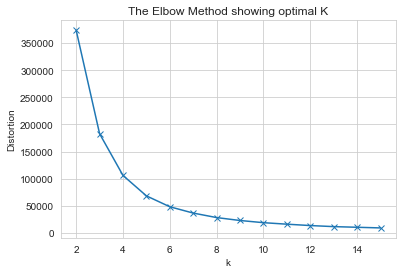

In [80]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


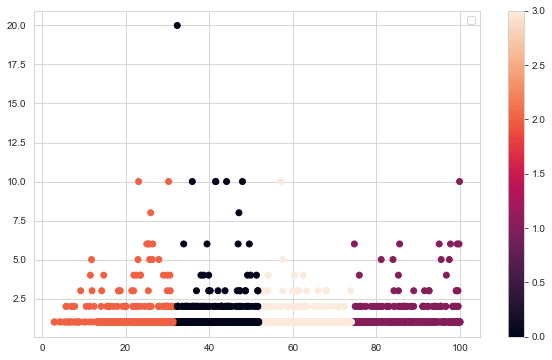

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(df["Orders.total"], df["Order_Items.qty"],c=tahmin)
plt.legend()
plt.colorbar()
plt.show()

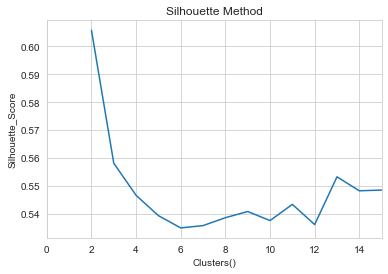

In [82]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhouette_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()
